# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Save config information:
url='http://api.openweathermap.org/data/2.5/weather?'
units='imperial'

# Build partial query URL:
query_url=f'{url}appid={weather_api_key}&units={units}&q='

In [4]:
# Set up lists to hold response info:
city_name=[]         
cloud=[]        
country=[]        
date=[]         
humidity=[]         
lat=[]         
lng=[]          
maxtemp=[]      
wind=[]         

# Loop through the list of cities and perform a request for data on each and add data to corresponding lists:

count=1 # Set counter to start value 1 for printouts of the current set count.
# Print to logger
print('Beginning Data Retrieval')     
print('-----------------------------')
# Loop through all the cities in our list to fetch weather data
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                                # Ignore errors in response.
            city_name.append(response['name'])
            cloud.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            
            print(city + ' city not found. Skipping...') # In case one of the responses comes back with error "KeyError"
                                                            # which could be the city or one of the data points missing.    
        count=count+1
        

        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 607 | san carlos de bariloche
Processing Record 2 of 607 | kolosovka
Processing Record 3 of 607 | gorgan
Processing Record 4 of 607 | kaitangata
Processing Record 5 of 607 | bluff
Processing Record 6 of 607 | temuco
Processing Record 7 of 607 | nantucket
Processing Record 8 of 607 | grand river south east
grand river south east city not found. Skipping...
Processing Record 9 of 607 | karasjok
Processing Record 10 of 607 | punta arenas
Processing Record 11 of 607 | mazagao
Processing Record 12 of 607 | alofi
Processing Record 13 of 607 | iqaluit
Processing Record 14 of 607 | dinsor
dinsor city not found. Skipping...
Processing Record 15 of 607 | los llanos de aridane
Processing Record 16 of 607 | qaanaaq
Processing Record 17 of 607 | kadykchan
kadykchan city not found. Skipping...
Processing Record 18 of 607 | mataura
Processing Record 19 of 607 | kloulklubed
Processing Record 20 of 607 | mar del plata
Process

Processing Record 189 of 607 | abnub
Processing Record 190 of 607 | nanortalik
Processing Record 191 of 607 | cantaura
Processing Record 192 of 607 | paramonga
Processing Record 193 of 607 | kaka
Processing Record 194 of 607 | boyolangu
Processing Record 195 of 607 | manuk mangkaw
Processing Record 196 of 607 | torbay
Processing Record 197 of 607 | ilulissat
Processing Record 198 of 607 | esmeralda
Processing Record 199 of 607 | lompoc
Processing Record 200 of 607 | kurchum
Processing Record 201 of 607 | nome
Processing Record 202 of 607 | flin flon
Processing Record 203 of 607 | saint-georges
Processing Record 204 of 607 | bahia de caraquez
Processing Record 205 of 607 | weyburn
Processing Record 206 of 607 | brae
Processing Record 207 of 607 | san policarpo
Processing Record 208 of 607 | saint-ambroise
Processing Record 209 of 607 | tabuk
Processing Record 210 of 607 | cidreira
Processing Record 211 of 607 | bhinmal
Processing Record 212 of 607 | deep river
Processing Record 213 of 6

Processing Record 378 of 607 | college
Processing Record 379 of 607 | humaita
Processing Record 380 of 607 | eureka
Processing Record 381 of 607 | shakawe
Processing Record 382 of 607 | mbanza-ngungu
Processing Record 383 of 607 | vallenar
Processing Record 384 of 607 | pingxiang
Processing Record 385 of 607 | burica
burica city not found. Skipping...
Processing Record 386 of 607 | sabla
Processing Record 387 of 607 | kavaratti
Processing Record 388 of 607 | kaina
Processing Record 389 of 607 | tambovka
Processing Record 390 of 607 | fairbanks
Processing Record 391 of 607 | ixtapa
Processing Record 392 of 607 | vila velha
Processing Record 393 of 607 | sur
Processing Record 394 of 607 | ipu
Processing Record 395 of 607 | bandarbeyla
Processing Record 396 of 607 | camabatela
Processing Record 397 of 607 | millinocket
Processing Record 398 of 607 | mgandu
Processing Record 399 of 607 | syumsi
Processing Record 400 of 607 | shangzhi
Processing Record 401 of 607 | novoagansk
Processing Rec

Processing Record 570 of 607 | poso
Processing Record 571 of 607 | remanso
Processing Record 572 of 607 | kargil
Processing Record 573 of 607 | dibulla
Processing Record 574 of 607 | ondorhaan
ondorhaan city not found. Skipping...
Processing Record 575 of 607 | kalanguy
Processing Record 576 of 607 | partizanskoye
Processing Record 577 of 607 | gawler
Processing Record 578 of 607 | bac lieu
Processing Record 579 of 607 | bowen
Processing Record 580 of 607 | abu samrah
Processing Record 581 of 607 | toliary
toliary city not found. Skipping...
Processing Record 582 of 607 | mlonggo
Processing Record 583 of 607 | bealanana
Processing Record 584 of 607 | yaan
Processing Record 585 of 607 | balabac
Processing Record 586 of 607 | phalodi
Processing Record 587 of 607 | kutum
Processing Record 588 of 607 | shitanjing
Processing Record 589 of 607 | taunton
Processing Record 590 of 607 | russkaya polyana
Processing Record 591 of 607 | high prairie
Processing Record 592 of 607 | port shepstone
Pr

In [5]:
# Convert the cities weather data into a Pandas DataFrame
weather_dict = {
    'City': city_name,
    'Country': country,
    'Date': date,
    'Lat': lat,
    'Lng': lng,
    'Cloudiness (%)': cloud,
    'Humidity (%)': humidity,
    'Max Temp (F)': maxtemp,
    'Wind Speed (mph)': wind
}

city_data=pd.DataFrame(weather_dict)

city_data.count()

City                556
Country             556
Date                556
Lat                 556
Lng                 556
Cloudiness (%)      556
Humidity (%)        556
Max Temp (F)        556
Wind Speed (mph)    556
dtype: int64

In [6]:
# Display sample data
city_data.head()

,City,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Bariloche,AR,1681416521,-41.1456,-71.3082,11,45,59.45,3.04
1,Kolosovka,RU,1681416660,56.4678,73.6110,100,92,21.83,15.39
2,Gorgan,IR,1681416660,36.8387,54.4348,0,82,57.16,0.00
3,Kaitangata,NZ,1681416660,-46.2817,169.8464,74,84,52.77,12.28
4,Bluff,NZ,1681416661,-46.6000,168.3333,11,80,52.81,17.87


In [7]:
# Export the City_Data into a csv
city_data.to_csv("output_data/cities.csv", index_label="City")

In [8]:
# Read saved data
city_data = pd.read_csv("output_data/cities.csv", index_col="City")

# Display sample data
city_data.head()

,City.1,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City,,,,,,,,,
0,Bariloche,AR,1681416521,-41.1456,-71.3082,11,45,59.45,3.04
1,Kolosovka,RU,1681416660,56.4678,73.6110,100,92,21.83,15.39
2,Gorgan,IR,1681416660,36.8387,54.4348,0,82,57.16,0.00
3,Kaitangata,NZ,1681416660,-46.2817,169.8464,74,84,52.77,12.28
4,Bluff,NZ,1681416661,-46.6000,168.3333,11,80,52.81,17.87


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

/var/folders/cl/4w0_htt92_vbdf8v6g2mwf0r0000gn/T/ipykernel_22545/3623175031.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Max Latitude vs. Temperature ' + '(' + str(pd.datetime.now().date()) + ')')


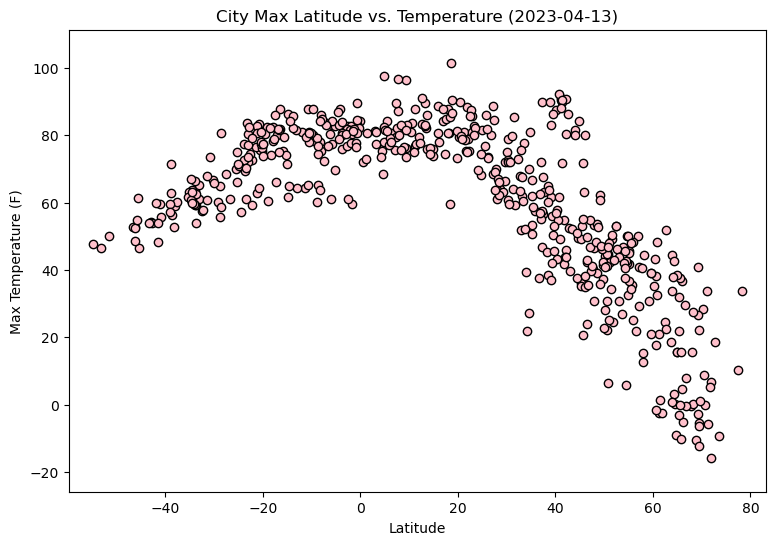

In [16]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,6))
plt.scatter(city_data['Lat'], city_data['Max Temp (F)'], marker='o', edgecolors='black', color='pink')

# Incorporate the other graph properties:
plt.title('City Max Latitude vs. Temperature ' + '(' + str(pd.datetime.now().date()) + ')')
plt.ylabel('Max Temperature (F)', color='black')
plt.xlabel('Latitude', color='black')

# Set the limits of the y axis:
plt.ylim(min(city_data['Max Temp (F)'])-10, max(city_data['Max Temp (F)'])+10)

# Set the limits of the x axis:
plt.xlim(min(city_data['Lat'])-5, max(city_data['Lat'])+5)



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

/var/folders/cl/4w0_htt92_vbdf8v6g2mwf0r0000gn/T/ipykernel_22545/635857769.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')')


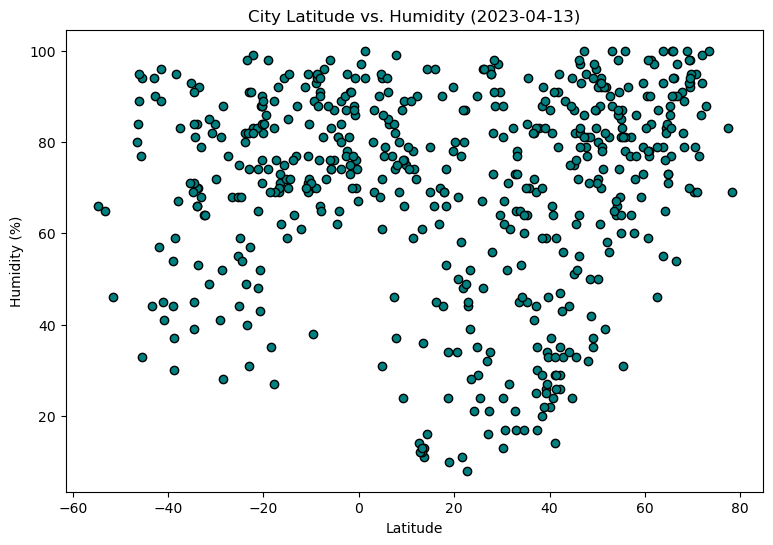

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,6))
plt.scatter(city_data['Lat'], city_data['Humidity (%)'], marker='o', edgecolors='black', color='teal')


# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')')
plt.ylabel('Humidity (%)', color='black')
plt.xlabel('Latitude', color='black')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

/var/folders/cl/4w0_htt92_vbdf8v6g2mwf0r0000gn/T/ipykernel_22545/2843683491.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.datetime.now().date()) + ')')


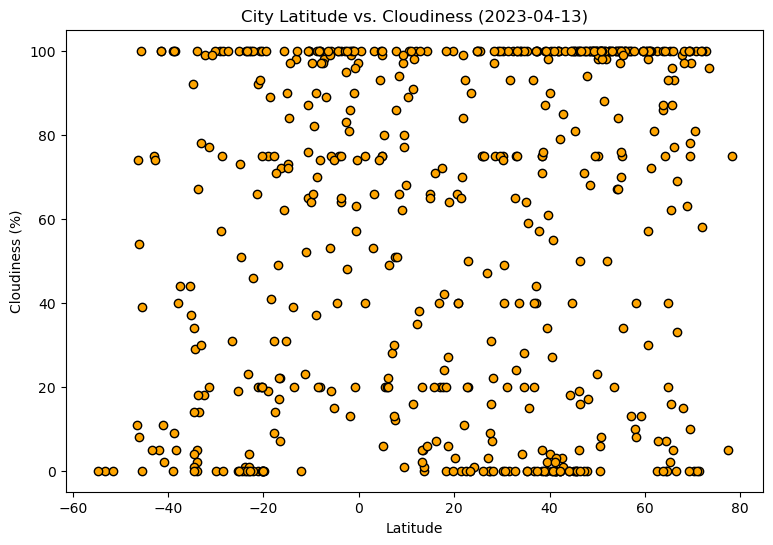

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,6))
plt.scatter(city_data['Lat'], city_data['Cloudiness (%)'], marker='o', edgecolors='black', color='orange')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.datetime.now().date()) + ')')
plt.ylabel('Cloudiness (%)', color='black')
plt.xlabel('Latitude', color='black')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

/var/folders/cl/4w0_htt92_vbdf8v6g2mwf0r0000gn/T/ipykernel_22545/2172751912.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.datetime.now().date()) + ')')


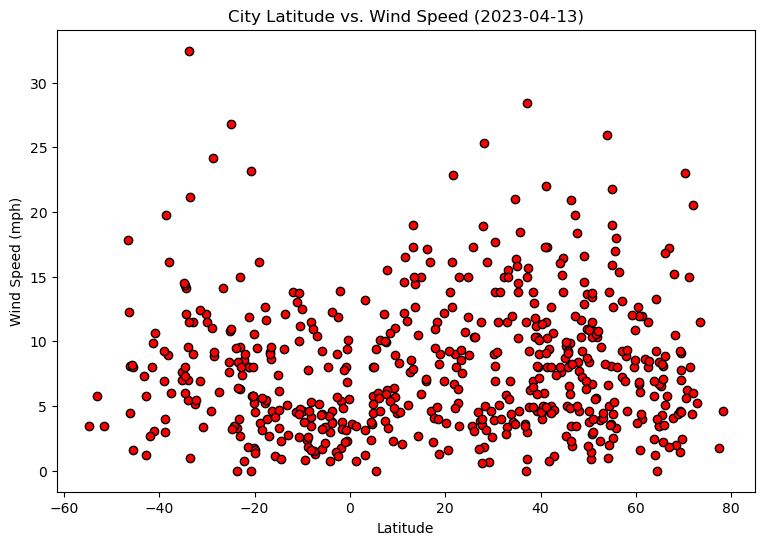

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,6))
plt.scatter(city_data['Lat'], city_data['Wind Speed (mph)'], marker='o', edgecolors='black', color='red')


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.datetime.now().date()) + ')')
plt.ylabel('Wind Speed (mph)', color='black')
plt.xlabel('Latitude', color='black')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data[city_data['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City.1,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City,,,,,,,,,
1,Kolosovka,RU,1681416660,56.4678,73.6110,100,92,21.83,15.39
2,Gorgan,IR,1681416660,36.8387,54.4348,0,82,57.16,0.00
6,Nantucket,US,1681416662,41.2835,-70.0995,0,59,71.74,17.27
7,Karasjok,NO,1681416663,69.4719,25.5112,10,93,22.05,9.06
11,Iqaluit,CA,1681416664,63.7506,-68.5145,86,79,18.70,2.46


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data[city_data['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City.1,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City,,,,,,,,,
0,Bariloche,AR,1681416521,-41.1456,-71.3082,11,45,59.45,3.04
3,Kaitangata,NZ,1681416660,-46.2817,169.8464,74,84,52.77,12.28
4,Bluff,NZ,1681416661,-46.6000,168.3333,11,80,52.81,17.87
5,Temuco,CL,1681416661,-38.7333,-72.6000,9,37,71.37,2.98
8,Punta Arenas,CL,1681416663,-53.1500,-70.9167,0,65,46.42,5.75


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6966740889927945


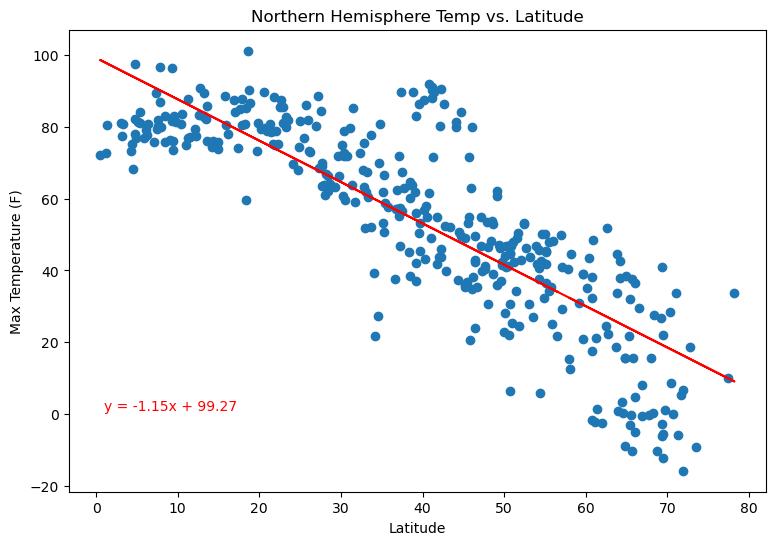

In [34]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1, 1), color='red')
plt.title('Northern Hemisphere Temp vs. Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.593665273854917


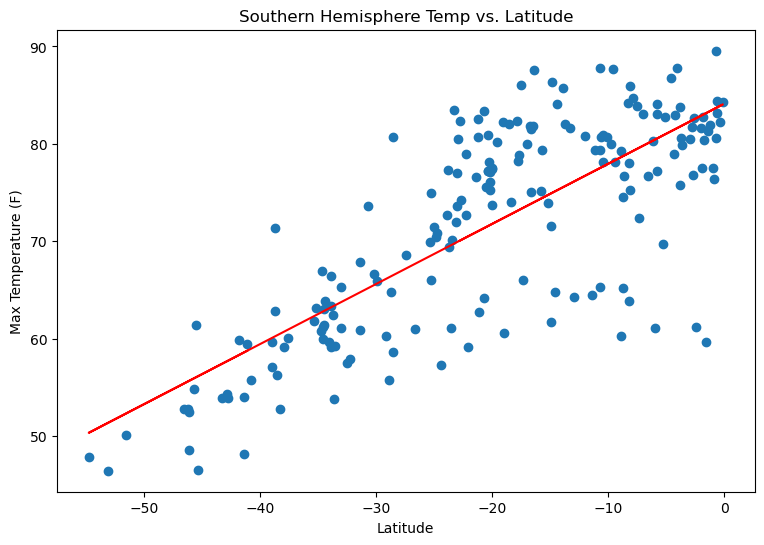

In [47]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1, 1), color='red')
plt.title('Southern Hemisphere Temp vs. Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is a positive correlation between the latitude and the temperature in the southern hemisphere, the further south you get the higher the temperature will be. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06818168051006486


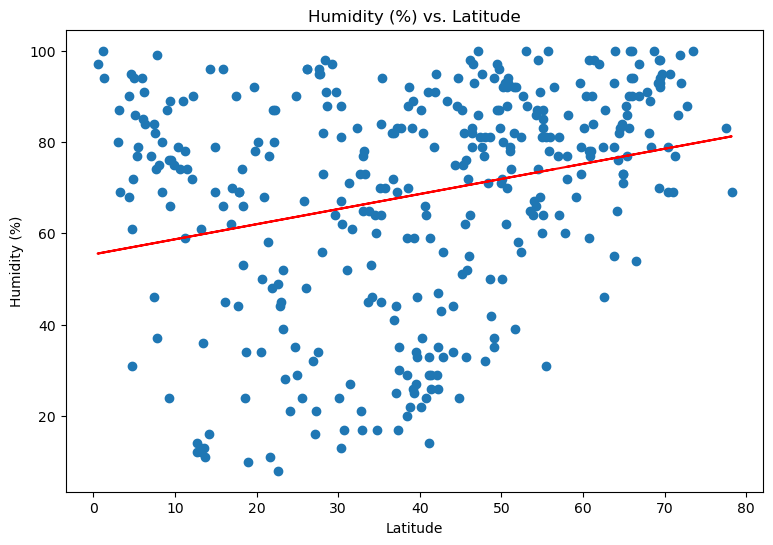

In [43]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(1, 1), color='red')
plt.title('Humidity (%) vs. Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is almost no correlation between the humidity level and the latitude.

The r-squared is: 0.07282124800175038


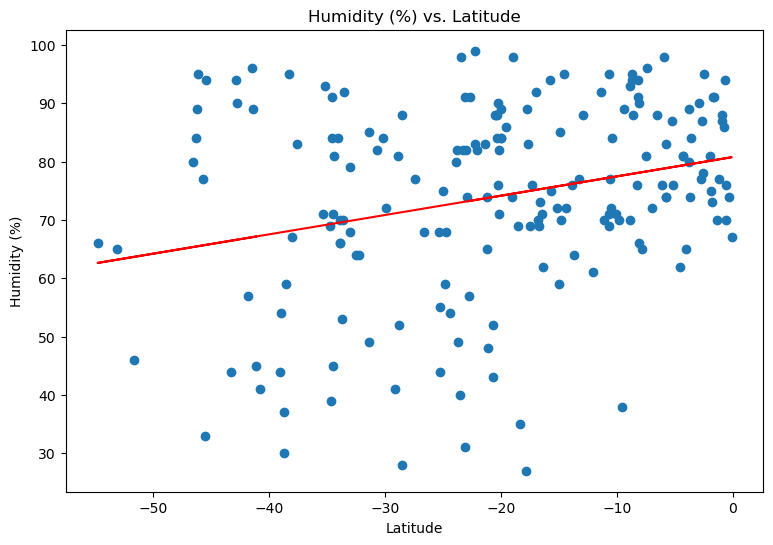

In [44]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values =southern_hemi_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(1, 1), color='red')
plt.title('Humidity (%) vs. Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is also no correlation between the two here.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.021508838875209952


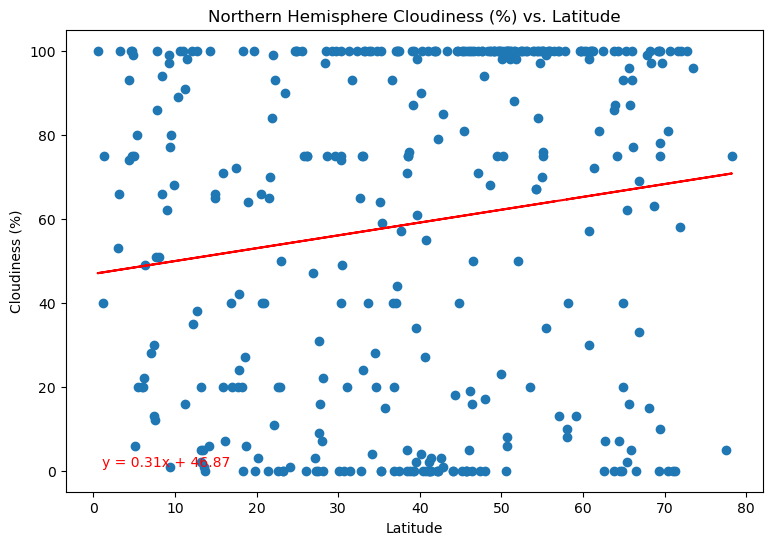

In [49]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1, 1), color='red')
plt.title('Northern Hemisphere Cloudiness (%) vs. Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The data is widley ranged which shows there is no correlation between how high or low the latitude is compared to cloudiness.

The r-squared is: 0.1392338169821944


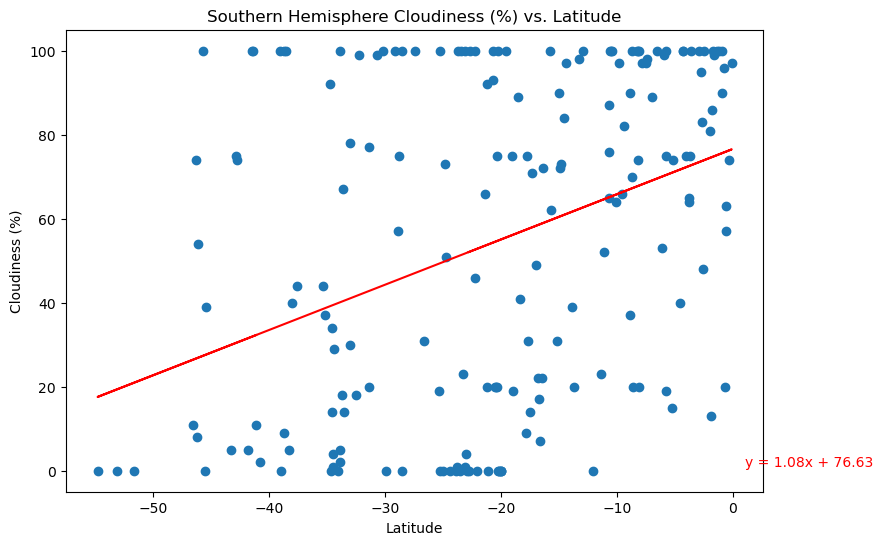

In [50]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1, 1), color='red')
plt.title('Southern Hemisphere Cloudiness (%) vs. Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The data is widley ranged which shows there is no correlation between how high or low the latitude is compared to cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 3.959051997417017e-06


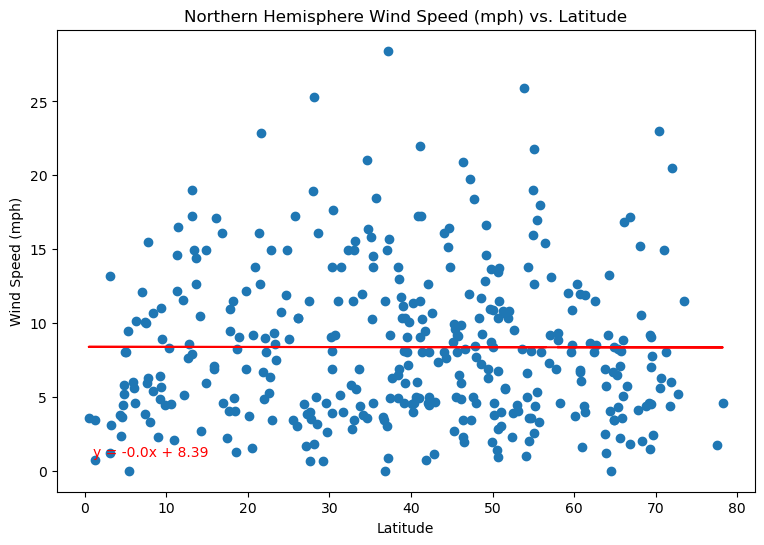

In [51]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1, 1), color='red')
plt.title('Northern Hemisphere Wind Speed (mph) vs. Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.05512882346627676


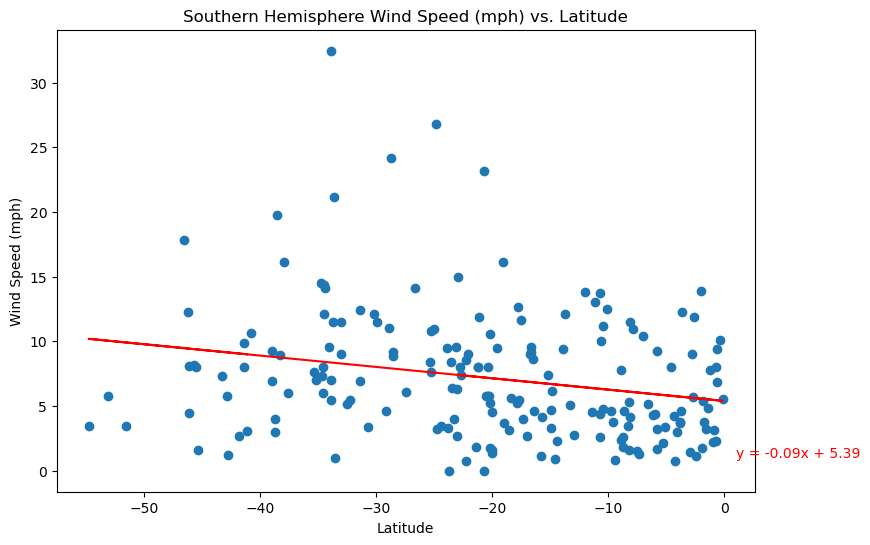

In [52]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1, 1), color='red')
plt.title('Southern Hemisphere Wind Speed (mph) vs. Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is very little correlation between the wind speed in the nirth but when you go south there is a mild correlation between the two. The further south you go, the more windy it may be.